In [60]:
import numpy as np
import pandas as pd
import datetime
import time
from pycoingecko import CoinGeckoAPI
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
#creating a client
cg = CoinGeckoAPI()

In [43]:
#checking connection
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

In [44]:
#date/time helper functions

def to_unix(year, month, day, hour, second):
    unix_time = datetime.datetime(year, month, day, hour, second)
    return time.mktime(unix_time.timetuple())

def to_humantime(unix):
    return datetime.datetime.fromtimestamp(unix)

In [46]:
#Select timeframe
start_time = to_unix(2021, 1, 1, 0, 0)
end_time = to_unix(2022, 8, 22, 0, 0)
print("start:", start_time, 'end:', end_time)

start: 1609477200.0 end: 1661140800.0


In [48]:
#Pulling eth and btc market data from time range specified above
ethereum_data = cg.get_coin_market_chart_range_by_id(
id='ethereum',
vs_currency='usd',
from_timestamp=start_time,
to_timestamp=end_time
)

bitcoin_data = cg.get_coin_market_chart_range_by_id(
id='bitcoin',
vs_currency='usd',
from_timestamp=start_time,
to_timestamp=end_time
)

In [56]:
#Checking information layout returned
print("dict keys:", ethereum_data.keys())

dict keys: dict_keys(['prices', 'market_caps', 'total_volumes'])


In [54]:
#Building data
eth = {}
eth['time'] = [x[0] for x in ethereum_data['prices']]
eth['price'] = [x[1] for x in ethereum_data['prices']]

btc = {}
btc['time'] = [x[0] for x in bitcoin_data['prices']]
btc['price'] = [x[1] for x in bitcoin_data['prices']]

<AxesSubplot:xlabel='time', ylabel='price'>

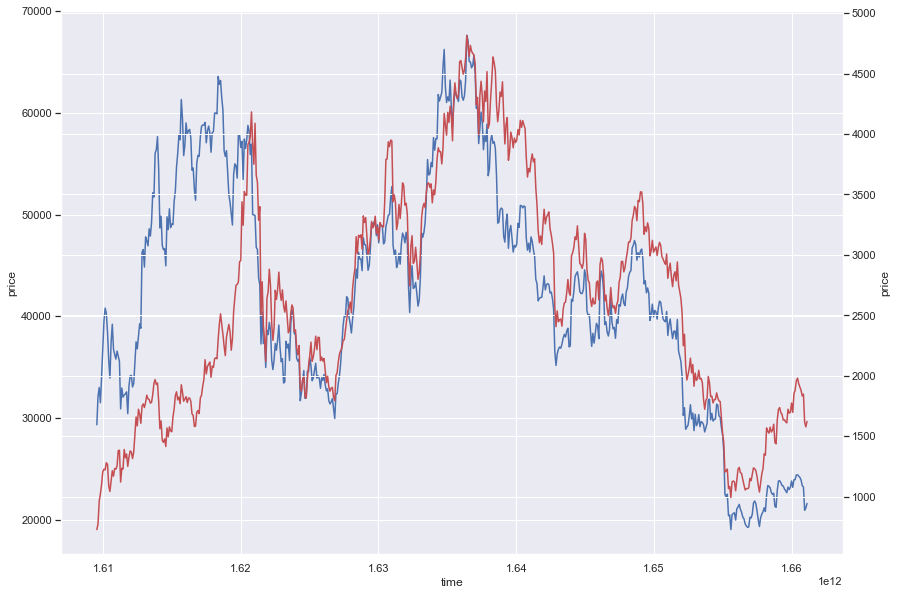

In [79]:
#Graphing data
sns.set(rc={'figure.figsize': (14,10)})
sns.set_theme(style="darkgrid")

sns.lineplot(x='time', y='price', data = btc)

second_axis = plt.twinx()

sns.lineplot(x='time', y='price', data = eth, ax = second_axis, color = 'r')

In [20]:
#Getting list of all coins and putting it into a dataframe
coins = cg.get_coins_list()
coinsDF = pd.DataFrame.from_dict(coins)
coinsDF.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index
3,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash


In [28]:
#making a dataframe of just names
name = coinsDF['name']
name.head()

0                     01coin
1         0.5X Long Algorand
2    0.5X Long Altcoin Index
3         0.5X Long AscendEx
4     0.5X Long Bitcoin Cash
Name: name, dtype: object

In [35]:
#checking the price of ethereum and bitcoin
ETHprice = cg.get_price(ids = 'ethereum, bitcoin', vs_currencies = 'usd')
print(ETHprice)

{'bitcoin': {'usd': 21266}, 'ethereum': {'usd': 1630.59}}
